In [1]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex

# Introduction circuits, gates, matrix representations
- circuits are diagrammatic representation of unitary operators (matrices / operators). E.g.: $R_z(\theta) = \exp(-i \theta Z / 2)$
- [List of quantum gates (wikipedia)](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)
- [List of gates pre-defined in Qiskit](https://qiskit.org/documentation/apidoc/circuit_library.html#module-qiskit.circuit.library)

### Single qubit operations

##### Computational basis states

$$
| 0 \rangle = | \uparrow \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ , \ \ | 1 \rangle = | \downarrow \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

In [2]:
circ = QuantumCircuit(1)

state = Statevector(circ)
print(state.data)
state.draw('latex')



[1.+0.j 0.+0.j]


<IPython.core.display.Latex object>

In [3]:
circ = QuantumCircuit(1)
circ.x(0)
print(circ.draw())

state = Statevector(circ)
print(state.data)
state.draw('latex')


   ┌───┐
q: ┤ X ├
   └───┘
[0.+0.j 1.+0.j]


<IPython.core.display.Latex object>

In [4]:
circ = QuantumCircuit(1)
circ.h(0)
print(circ.draw())

state = Statevector(circ)
print(state.data)
state.draw('latex')


   ┌───┐
q: ┤ H ├
   └───┘
[0.70710678+0.j 0.70710678+0.j]


<IPython.core.display.Latex object>

#### Rotational gates

- with $\sigma^\mu$ being one of the Pauli matrices, $ \sigma^\mu \in \{ X, Y, Z\}$,
$$
R_\mu (\theta) = \exp \bigl( -i \frac{\theta}{2} \sigma^\mu \bigr) = \cos \bigl( \frac{\theta}{2} \bigr) I - i \sin \bigl( \frac{\theta}{2} \bigr) \sigma^\mu
$$
- Can use rotation gates to generate other gates, e.g.,
$$
H = R_y(\pi / 2) Z
$$

In [5]:
circ = QuantumCircuit(1)
# circ.z(0)
circ.ry(np.pi/2, 0)
print(circ.draw())

state = Statevector(circ)
print(state.data)
state.draw('latex')

   ┌─────────┐
q: ┤ Ry(π/2) ├
   └─────────┘
[0.70710678+0.j 0.70710678+0.j]


<IPython.core.display.Latex object>

These gates can be parametrized as well.

In [6]:
param = Parameter('a')

circ = QuantumCircuit(1)
circ.ry(param, 0)

print(circ.draw())


   ┌───────┐
q: ┤ Ry(a) ├
   └───────┘


In [7]:
circ_bound = circ.bind_parameters({param: np.pi/2})
print(circ_bound.draw())

Statevector(circ_bound).draw('latex')


   ┌─────────┐
q: ┤ Ry(π/2) ├
   └─────────┘


<IPython.core.display.Latex object>

In reality, one does not have access to the statevector. Qubits are measured and will collapse
onto specific (computational) basis state. One has to prepare the state / circuit multiple times
and repeatedly measure the state to obtain statistics for the state. This results in a probability
distribution of basis states, each with probability
$$
\mathrm{Pr}(|\alpha \rangle) = | \langle \alpha | \psi \rangle|^2 \ .
$$

For the above GHZ state, the probability for both basis states is 0.5 each. We can add measurements to our circuit and simulate this measurement process.

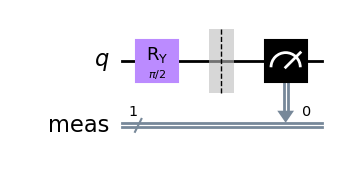

In [8]:
circ_bound.measure_all()
circ_bound.draw('mpl')

In [9]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [10]:
shots = 1000
result = AerSimulator().run(circuits=circ_bound, shots=shots).result()
counts = result.get_counts()


{'1': 511, '0': 489}
0.489 0.511


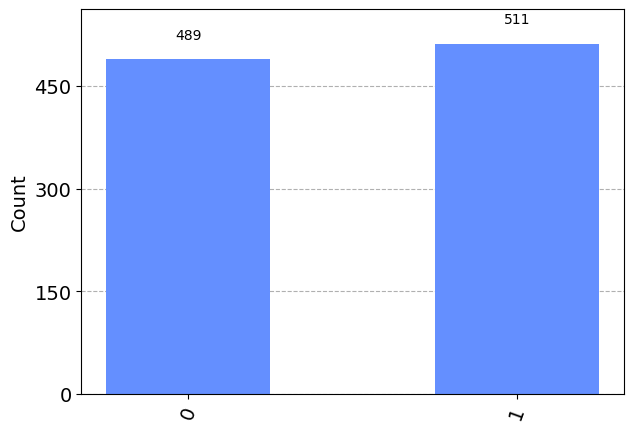

In [11]:
print(counts)
print(counts["0"]/shots, counts["1"]/shots)
plot_histogram(counts)


Now let's see how this changes with more shots

In [12]:
shot_vals = [1e2, 1e3, 1e4, 1e5]
for shots in shot_vals:
    result = AerSimulator().run(circuits=circ_bound, shots=shots).result()
    counts = result.get_counts()

    print(f"for {shots} shots, the counts are {counts} with probabilities 0: {counts['0']/shots}, 1: {counts['1']/shots}")

for 100.0 shots, the counts are {'1': 50, '0': 50} with probabilities 0: 0.5, 1: 0.5
for 1000.0 shots, the counts are {'0': 538, '1': 462} with probabilities 0: 0.538, 1: 0.462
for 10000.0 shots, the counts are {'0': 4972, '1': 5028} with probabilities 0: 0.4972, 1: 0.5028
for 100000.0 shots, the counts are {'1': 50284, '0': 49716} with probabilities 0: 0.49716, 1: 0.50284


In [13]:
circ_phase = QuantumCircuit(1)
circ_phase.ry(-np.pi/2, 0)

Statevector(circ_phase).draw('latex')

<IPython.core.display.Latex object>

In [14]:
circ_phase.measure_all()

In [15]:
shots = 1000
result = AerSimulator().run(circuits=circ_bound, shots=shots).result()
counts = result.get_counts()

{'1': 503, '0': 497}
0.497 0.503


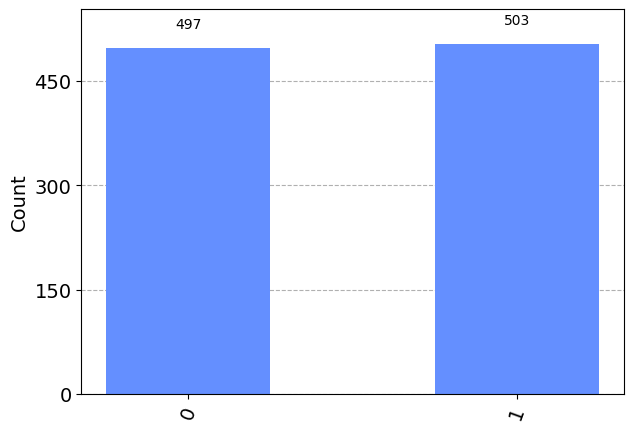

In [16]:
print(counts)
print(counts["0"]/shots, counts["1"]/shots)
plot_histogram(counts)

### Multi qubit states and operations

- **Important: Qiskit uses little endian** ([see here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Basis-vector-ordering-in-Qiskit))
- This is the opposite to conventional textbooks, including the lecture notes
- This means, the most significant bit appears left most while the least significant bit is written right-most.

In [18]:
# Flipping qubit 0 actually flips the right-most qubit in the register
circ = QuantumCircuit(2)
circ.x(0)

state = Statevector(circ)
print(state.data)
state.draw('latex')


[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


<IPython.core.display.Latex object>

In [19]:
# Flipping qubit 0 actually flips the right-most qubit in the register
circ = QuantumCircuit(3)
circ.x(0)
print(circ.draw())

state = Statevector(circ)
print(state.data)
state.draw('latex')


     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


<IPython.core.display.Latex object>

In [20]:
# Flipping qubit 2 actually flips the right-most qubit in the register
circ = QuantumCircuit(3)
circ.x(2)
print(circ.draw())

state = Statevector(circ)
print(state.data)
state.draw('latex')


          
q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]


<IPython.core.display.Latex object>

The CNOT (or CX) gate flips the target qubit if the control qubit is in state $|1 \rangle$

In [22]:
circ = QuantumCircuit(2)
circ.cx(0, 1)
print(circ.draw())

matrix = Operator(circ).data
print(matrix)

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [23]:
array_to_latex(matrix)

<IPython.core.display.Latex object>

In [24]:
circ = QuantumCircuit(2)
circ.cx(1, 0)
print(circ.draw())

matrix = Operator(circ).data


     ┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──
          


In [25]:
array_to_latex(matrix)

<IPython.core.display.Latex object>

### Create a GHZ state

In [26]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx([0, 1], [1, 2])
print(circ.draw())


     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘


In [27]:
state = Statevector(circ)
print(state)
state.draw('latex')


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In reality, one does not have access to the statevector. Qubits are measured and will collapse
onto specific (computational) basis state. One has to prepare the state / circuit multiple times
and repeatedly measure the state to obtain statistics for the state. This results in a probability
distribution of basis states, each with probability
$$
\mathrm{Pr}(|\alpha \rangle) = | \langle \alpha | \psi \rangle|^2 \ .
$$

For the above GHZ state, the probability for both basis states is 0.5 each. We can add measurements to our circuit and simulate this measurement process.

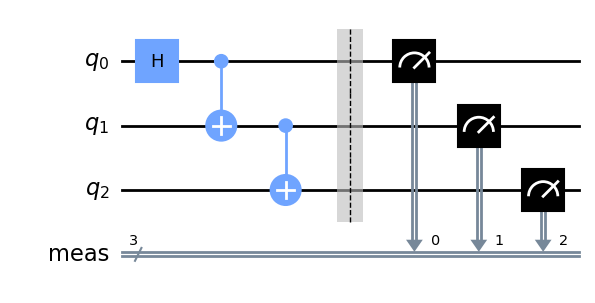

In [28]:
circ.measure_all()
circ.draw('mpl')

In [29]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram


In [30]:
shots = 1000
result = AerSimulator().run(circuits=circ, shots=shots).result()
counts = result.get_counts()


In [31]:
print(counts)
print(counts["000"]/shots, counts["111"]/shots)

{'111': 492, '000': 508}
0.508 0.492


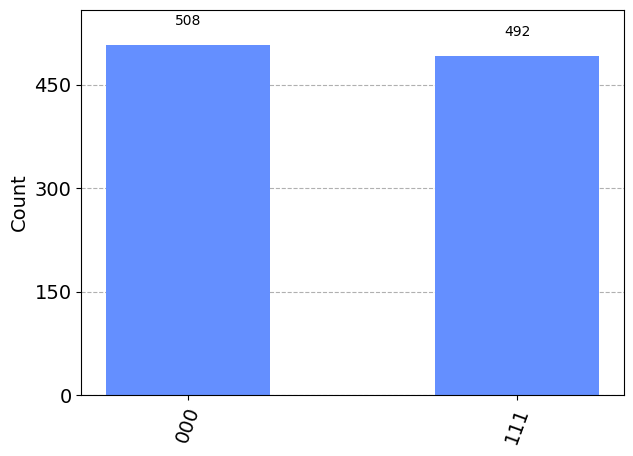

In [32]:
plot_histogram(counts)

## Or more spread-out states

In [33]:
circ = QuantumCircuit(3)
circ.h(0)
circ.rz(0.12, 1)
circ.ry(1.2, 2)
circ.cx([0, 1], [1, 2])
circ.h(0)
print(circ.draw())

state = Statevector(circ)
print(state)
state.draw('latex')



        ┌───┐         ┌───┐
q_0: ───┤ H ├──────■──┤ H ├
     ┌──┴───┴───┐┌─┴─┐└───┘
q_1: ┤ Rz(0.12) ├┤ X ├──■──
     ├─────────┬┘└───┘┌─┴─┐
q_2: ┤ Ry(1.2) ├──────┤ X ├
     └─────────┘      └───┘
Statevector([ 0.41192523-0.02474522j,  0.41192523-0.02474522j,
              0.28181321-0.01692911j, -0.28181321+0.01692911j,
              0.28181321-0.01692911j,  0.28181321-0.01692911j,
              0.41192523-0.02474522j, -0.41192523+0.02474522j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

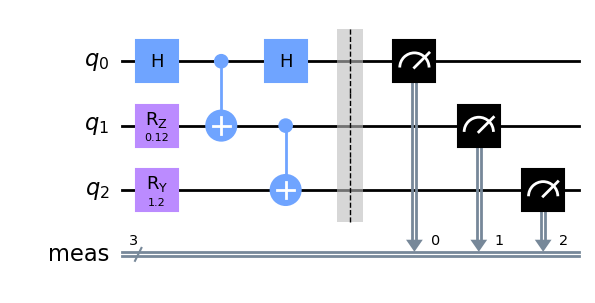

In [34]:
circ.measure_all()
circ.draw('mpl')

In [35]:
shots = 1000
result = AerSimulator().run(circuits=circ, shots=shots).result()
counts = result.get_counts()

{'101': 100, '110': 159, '010': 77, '000': 180, '001': 148, '100': 85, '011': 72, '111': 179}
0.18 0.179


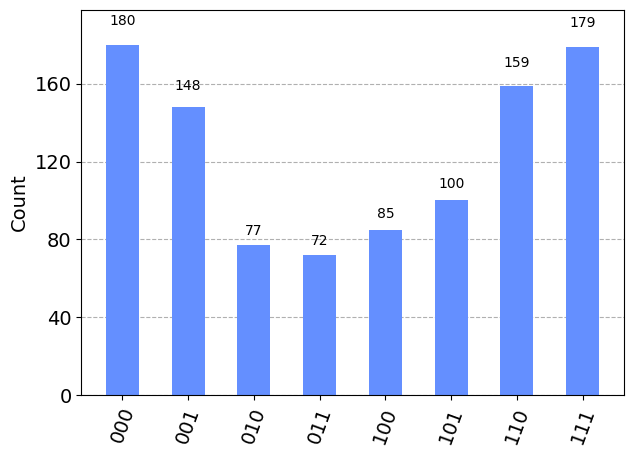

In [36]:
print(counts)
print(counts["000"]/shots, counts["111"]/shots)
plot_histogram(counts)
